# Import Library

In [1]:
import numpy as np
import os
from glob import glob
import torch
import torch.nn as nn
import cv2
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.layers import Dropout

# Load Dataset

In [2]:
# Path Dataset
# path = ['../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/']
path = ['../input/brain-tumor-detection/']

In [3]:
# Load dataset
class LoadDataset:
    def get_data(data_paths):
        images = [] # images
        y = [] # labels
        labels = ['yes', 'no']
        for data_path in data_paths: # Loop sebanyak path data
            for label in labels: # Loop sebanyak label yaitu yes dan no
                curr_path = data_path + label
                for img in os.listdir(curr_path): # digunakan untuk mendapatkan daftar semua file dan direktori di direktori yang ditentukan. 
                    image = cv2.resize(cv2.imread(os.path.join(curr_path, img), 0), (224, 224)) # resize to 224 dan load image in grayscale mode
                    images.append(image) # append ke array
                    if (label == 'yes'): # append kedalam label berdasarkan kondisi image
                        y.append(1)
                    elif (label == 'no'):
                        y.append(0)

        images = np.array(images) # create numpy array
        y = to_categorical(y) # diubah menjadi array numpy (atau) matriks yang memiliki nilai biner dan memiliki kolom sama dengan jumlah kategori di data. 
        return images,y

In [4]:
x,y = LoadDataset.get_data(path)
print("Load Dataset done")

Load Dataset done


In [5]:
# Split dataset to 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state = 42,shuffle = True)
# Expand the shape of an array
xtrain = np.expand_dims(xtrain, axis=-1) #-1 means expand the LAST axis
xtest = np.expand_dims(xtest, axis=-1) #-1 means expand the LAST axis
# Print shape 
print("X_train shape: {}".format(xtrain.shape))
print("X_test shape: {}".format(xtest.shape))
print("y_train shape: {}".format(ytrain.shape))
print("y_test shape: {}".format(ytest.shape))

X_train shape: (2400, 224, 224, 1)
X_test shape: (600, 224, 224, 1)
y_train shape: (2400, 2)
y_test shape: (600, 2)


# Manual Calculation

In [6]:
import random

print(round(random.uniform(0, 1), 3))

0.774


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


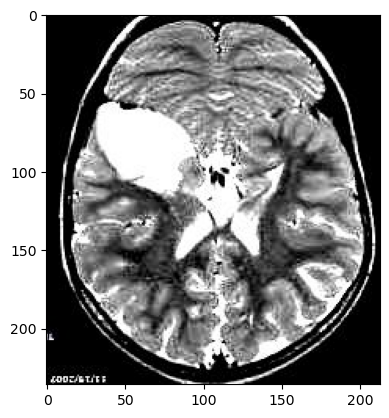

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../input/brain-tumor-detection/yes/y13.jpg')
imgplot = plt.imshow(img)
plt.show()

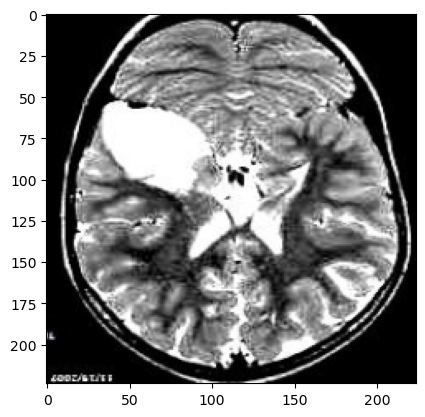

In [8]:
resized_image = cv2.resize(img, (224, 224)) 
imgplot = plt.imshow(resized_image)
plt.show()

Populating the interactive namespace from numpy and matplotlib


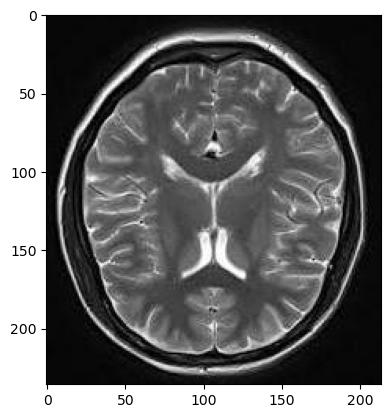

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('../input/brain-tumor-detection/no/no11.jpg')
imgplot = plt.imshow(img2)
plt.show()

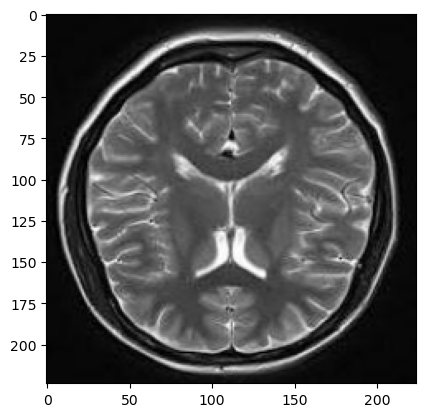

In [10]:
resized_image2 = cv2.resize(img2, (224, 224)) 
imgplot = plt.imshow(resized_image2)
plt.show()

In [11]:
# input matrix shape
image_path = '../input/brain-tumor-detection/yes/y13.jpg'
image = cv2.imread(image_path, 0)
image.shape

(236, 213)

## Print and Display Input Matrix

In [12]:
# display input matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
image_df = pd.DataFrame(image)
image_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,3,7,0,0,1,1,2,0,8,232,249,255,249,255,221,128,39,0,0,5,5,0,0,6,8,0,0,0,9,1,0,0,1,3,3,0,0,0,0,1,3,3,2,1,0,5,0,0,0,2,0,0,0,0,0,8,0,1,5,0,4,0,4,8,0,0,3,5,0,0,5,7,0,0,1,3,0,0,0,2,0,0,4,6,0,2,0,0,3,0,0,32,74,167,255,254,249,255,255,247,151,78,0,8,0,1,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,4,0,0,10,5,1,3,0,21,255,255,255,248,255,163,66,0,2,24,11,0,0,2,2,0,0,0,5,0,0,3,1,0,0,0,0,3,5,2,2,1,0,0,0,2,2,0,2,6,4,0,0,1,11,8,0,0,2,12,0,1,10,14,0,0,0,6,5,0,0,0,2,1,0,0,4,3,0,1,7,8,1,0,3,5,3,0,2,8,6,0,0,0,1,35,122,244,255,254,255,251,255,219,117,3,1,2,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,18,0,4,124,255,246,243,255,202,95,12,0,0,0,0,0,0,7,0,2,4,3,2,3,5,6,0,0,4,6,4,0,0,0,5,4,2,0,0,0,2,3,4,2,0,0,1,2,0,0,0,0,18,1,0,1,0,5,2,0,5,10,1,0,0,16,0,2,2,0,0,0,0,0,0,2,1,0,0,0,0,0,0,6,4,0,0,6,11,7,2,0,96,142,189,252,241,255,255,255,190,5,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,10,0,13,44,209,251,254,255,231,123,69,0,0,8,14,0,0,4,7,0,0,0,0,7,0,0,0,7,5,5,2,0,0,0,0,6,0,0,0,2,2,1,0,0,0,0,2,0,0,0,6,11,8,0,0,0,0,28,5,0,0,0,0,0,5,8,1,0,0,0,3,3,0,0,0,4,0,1,0,0,8,5,0,7,0,2,1,0,0,0,0,0,0,17,10,0,18,153,255,249,255,237,255,188,37,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,12,0,2,0,32,243,255,233,255,196,0,3,0,0,10,0,0,0,4,0,0,0,14,2,0,0,4,3,0,0,0,0,0,0,14,52,99,133,112,115,116,112,100,83,65,54,9,3,0,0,1,6,0,0,6,10,0,14,0,0,1,0,6,5,2,0,0,0,0,3,10,0,0,0,6,6,0,0,19,6,0,0,0,0,0,0,3,0,0,2,6,5,8,13,6,0,0,15,0,0,115,165,252,255,253,255,206,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,57,250,255,255,252,119,21,19,3,0,14,0,0,0,8,2,0,0,10,0,0,4,0,0,7,7,0,0,59,149,216,230,194,140,102,199,204,210,211,202,185,166,154,163,112,47,4,0,0,0,3,0,0,84,199,255,255,122,13,0,0,0,5,3,17,85,161,146,105,78,91,117,118,95,74,88,48,22,14,4,2,6,3,7,0,0,3,2,0,0,0,0,0,5,9,0,3,5,0,99,254,253,253,250,255,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,147,255,233,254,247,91,20,3,0,6,0,3,2,2,0,0,3,12,5,0,3,0,0,5,34,93,178,246,255,218,150,91,68,91,139,177,96,105,120,133,140,141,136,132,160,161,165,155,111,49,6,0,16,3,109,245,255,247,79,0,0,25,112,200,226,203,194,212,200,160,135,151,178,179,162,149,166,115,103,106,84,86,101,91,0,0,0,0,

# Preprocessing

In [13]:
# Augmentation
class Preprocessing:
    def augmentation(xtrain, ytrain):
        train_generator = ImageDataGenerator(
                rescale=1./255,
                horizontal_flip=True,
                shear_range = 0.05,
                channel_shift_range=0.05,
                rotation_range=15
            ).flow(
                xtrain,
                ytrain
            )

        return train_generator

In [14]:
train_generator = ImageDataGenerator(
                rescale=1./255,
                horizontal_flip=True,
                shear_range = 0.05,
                channel_shift_range=0.05,
                rotation_range=15
            ).flow(
                xtrain,
                ytrain
            )

test_generator = ImageDataGenerator(
                rescale=1./255,
                horizontal_flip=True,
                shear_range = 0.05,
                channel_shift_range=0.05,
                rotation_range=15
            ).flow(
                xtest,
                ytest
            )

# Class VGG16

In [15]:
# VGG16 with and without batch normalization
class VGG16:
    def build():
        model = Sequential()
        # 1st block
        model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 2nd block
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 3rd block
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 4th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 5th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # FC Layers 1
        model.add(Flatten())
        model.add(Dense(units=4096,activation="relu"))
        # FC Layers 2
        model.add(Dense(units=4096,activation="relu"))
        # Softmax Classifier
        model.add(Dense(units=2, activation="softmax"))
        return model

    
    def build_norm():
        model = Sequential()
        # 1st block
        model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 2nd block
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 3rd block
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 4th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 5th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # FC Layers 1
        model.add(Flatten())
        model.add(Dense(units=4096,activation="relu"))
        model.add(layers.BatchNormalization())
        # FC Layers 2
        model.add(Dense(units=4096,activation="relu"))
        model.add(layers.BatchNormalization())
        # Softmax Classifier
        model.add(Dense(units=2, activation="softmax"))
        return model

In [16]:
initializer = tf.keras.initializers.GlorotUniform()
values = initializer(shape=(3, 3))
print(values)

tf.Tensor(
[[ 0.48871875 -0.6201196  -0.885756  ]
 [ 0.9333055   0.42464352 -0.8042414 ]
 [ 0.9686618   0.8128774  -0.1418171 ]], shape=(3, 3), dtype=float32)


In [17]:
initializer = tf.keras.initializers.RandomUniform(minval=-0.408248290463863, maxval=0.408248290463863)
values = initializer(shape=(3, 3))
print(values)

tf.Tensor(
[[ 0.03502271 -0.3585341   0.23141974]
 [-0.3678803   0.25448942 -0.24265751]
 [ 0.223283   -0.0213106  -0.26554218]], shape=(3, 3), dtype=float32)


In [18]:
inp = torch.randn(1, 9)
weght = torch.randn(7,9)
 
torch.mm(inp,weght.t())
lay=nn.Linear(in_features=9,out_features=9,bias=False)
lay.weght=nn.Parameter(weght)
lay.weght
lay(inp)

tensor([[-0.0121, -0.0517, -0.0236,  0.0445, -0.6777,  0.1988,  0.4612, -0.3694,
         -0.3683]], grad_fn=<MmBackward0>)

In [19]:
inp = torch.randn(1, 9)
weght = torch.randn(7,9)
 
torch.mm(inp,weght.t())
lay=nn.Linear(in_features=9,out_features=9,bias=False)
lay.weght=nn.Parameter(weght)
lay.weght
lay(inp)

tensor([[ 0.0357, -0.1331,  0.7981, -0.2351, -0.2097, -0.6301, -0.0843, -0.8296,
          0.3943]], grad_fn=<MmBackward0>)

In [20]:
inp = torch.randn(2, 9)
weght = torch.randn(7,9)
 
torch.mm(inp,weght.t())
lay=nn.Linear(in_features=9,out_features=9,bias=False)
lay.weght=nn.Parameter(weght)
lay.weght
lay(inp)

tensor([[ 0.3040,  0.1079,  0.1527, -0.2956, -0.3503, -0.6530,  0.5519, -0.3571,
          0.0162],
        [-0.0777, -0.0253,  0.5033,  0.8114, -0.0918, -0.8331, -0.0711,  0.4817,
          0.2890]], grad_fn=<MmBackward0>)

# Class Evaluation

In [21]:
class Evaluation:  
    def confusion_matrix(xtest, ytest):
      y_test_hat = model.predict(xtest, batch_size=4) # memungkinkan kita untuk memprediksi label nilai data berdasarkan model yang dilatih. hanya menerima satu argumen yang biasanya merupakan data yang akan diuji.  
      y_test_hat = np.argmax(y_test_hat, axis=1) # mengembalikan indeks elemen maks array dalam sumbu tertentu. 
      y_test = np.argmax(ytest, axis=1)  

      # plot confusion matrix as heatmap
      conf_m = confusion_matrix(y_test, y_test_hat)
      plt.figure(figsize=(5,5)) # digunakan untuk membuat gambar baru. Mengatur size confusion matrix
      sns.set(font_scale=1.2) # untuk menskalakan ukuran font 
      ax = sns.heatmap(conf_m, annot=True,xticklabels=['N', 'T'], yticklabels=['N', 'T'], cbar=False, cmap="YlGnBu",linewidths=1, linecolor='black', fmt='.0f') # membuat heatmap & konfigurasi warna heatmap
      plt.yticks(rotation=0) # set rotasi label sumbu ke 0 artinya tidak dirotasi
      plt.xlabel('Predicted labels') # untuk Label Sumbu x
      plt.ylabel('Actual labels') # untuk Label Sumbu y
      ax.xaxis.set_ticks_position('top') 
      plt.title('Confusion matrix - test data\n(N - normal, T - tumor)') # untuk title heatmap
      plt.show() # untuk menampilkan plot
      return plt

    def classification_report(xtest, ytest):
      y_test_hat = model.predict(xtest, batch_size=4)
      y_test_hat = np.argmax(y_test_hat, axis=1)
      y_test = np.argmax(ytest, axis=1) 
      
      clas_r = classification_report(y_test, y_test_hat)
      return clas_r

# Model Spec

In [22]:
model = VGG16.build()
model.summary() # mencetak ringkasan model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## Learning Rate = 0.0001

In [23]:
# Mengonfigurasi model untuk pelatihan. 
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

## Epoch = 100

## Batch Size = 100

In [ ]:
# Mengonfigurasi model untuk pelatihan. 
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(train_generator, verbose=True, batch_size=100, epochs=100, validation_data=(test_generator), callbacks=[checkpoint, early])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.6808
Epoch 1: val_loss improved from inf to 0.54583, saving model to vgg16_1.h5
75/75 [==============================] - 40s 338ms/step - loss: 0.6228 - accuracy: 0.6808 - val_loss: 0.5458 - val_accuracy: 0.7250
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.4962 - accuracy: 0.7496
Epoch 2: val_loss improved from 0.54583 to 0.45449, saving model to vgg16_1.h5
75/75 [==============================] - 23s 310ms/step - loss: 0.4962 - accuracy: 0.7496 - val_loss: 0.4545 - val_accuracy: 0.8017
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.4359 - accuracy: 0.8083
Epoch 3: val_loss improved from 0.45449 to 0.39130, saving model to vgg16_1.h5
75/75 [==============================] - 23s 310ms/step - loss: 0.4359 - accuracy: 0.8083 - val_loss: 0.3913 - val_accuracy: 0.8283
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.3670 - accuracy

## Evaluation

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
# Visualisasikan Loss dan Accuracy Rate 
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()